In [1]:
# packages gerais
import pandas as pd
import joblib
from statsmodels.tsa.statespace.sarimax import SARIMAX

# df_sales_ dataset
df_sales_filtered_last_6_month = joblib.load('df_sales_filtered_last_6_month.pkl')

## 1 Create a date field based in Year and Week of the year

### 1.1 But the date to make sense should be the last day in that specific week

In [2]:
import datetime
# Function to get the last day of the week using ISO calendar
def get_last_day_of_iso_week(year, week):
    first_day_of_year = datetime.datetime(year, 1, 4)  # 4th January is always in the first ISO week
    first_monday_of_year = first_day_of_year - datetime.timedelta(days=first_day_of_year.weekday())
    week_start_date = first_monday_of_year + datetime.timedelta(weeks=week-1)
    return week_start_date + datetime.timedelta(days=6)

# Applying function to DataFrame
df_sales_filtered_last_6_month['last_day_of_week'] = df_sales_filtered_last_6_month.apply(
    lambda x: get_last_day_of_iso_week(x['year'], x['week']), axis=1
)

In [3]:
df_sales_filtered_last_6_month = df_sales_filtered_last_6_month[(df_sales_filtered_last_6_month['store_id'] == 'S0097') & (df_sales_filtered_last_6_month['product_id'].isin(['P0001', 'P0704', 'P0702','P0747']))]

### 1.2 Convert date to time series by set as index and sort that

In [4]:
# Set 'date' column as index and sort by date
df_sales_filtered_last_6_month.set_index('last_day_of_week', inplace=True)
df_sales_filtered_last_6_month.sort_index(inplace=True)

In [5]:
df_sales_filtered_last_6_month.head(60)

,store_id,product_id,year,week,sales,revenue,stock,price
last_day_of_week,,,,,,,,
2019-04-07,S0097,P0747,2019,14,9.0,141.10,11.0,20.90
2019-04-07,S0097,P0704,2019,14,6.0,18.89,39.0,3.40
2019-04-14,S0097,P0704,2019,15,4.0,12.60,35.0,3.40
2019-04-14,S0097,P0747,2019,15,9.0,141.12,2.0,20.90
2019-04-21,S0097,P0747,2019,16,4.0,68.81,6.0,20.90
2019-04-21,S0097,P0704,2019,16,20.0,47.85,15.0,3.40
2019-04-28,S0097,P0747,2019,17,3.0,53.14,3.0,20.90
2019-04-28,S0097,P0704,2019,17,15.0,33.04,20.0,3.40
2019-05-05,S0097,P0747,2019,18,2.0,35.42,5.0,20.90


### 1.3 Prepare to apply ARIMAX

In [7]:
# Group by 'store_id' and 'product_id'
grouped = df_sales_filtered_last_6_month.groupby(['store_id', 'product_id'])

# Create a DataFrame to store forecasts and a data frame to have those product/store with error
df_forecasts = pd.DataFrame(columns=['store_id', 'product_id', 'forecast_week_1', 'forecast_week_2', 'forecast_week_3', 'ARIMAX'])
df_product_error = pd.DataFrame(columns=['store_id', 'product_id', 'error_message'])

import warnings
from itertools import product

# Function to perform grid search for ARIMAX parameters
def optimize_arimax(series, exog, p_values, d_value, q_values):
    best_aic = float("inf")
    best_order = None
    best_model = None
    for p, q in product(p_values, q_values):
        try:
            model = SARIMAX(series, exog=exog, order=(p, d_value, q))
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d_value, q)
                best_model = model_fit
        except:
            continue
    return best_order, best_model

# Grid search parameters
p_values = range(0, 3)
d_value  = 1
q_values = range(0, 3)

# Iterate over each group
for (store_id, product_id), group in grouped:
    # Reindex to ensure complete weekly intervals
    group = group.asfreq('W-SUN', method='pad')
    
    # Ensure there are enough data points to fit the model
    if len(group) < 3:
        df_product_error = pd.concat([df_product_error, pd.DataFrame([{
            'store_id': store_id,
            'product_id': product_id,
            'error_message': 'Not enough data points to fit ARIMAX model'
        }])], ignore_index=True)
        continue
    
    warnings.filterwarnings("ignore")  # specify to ignore warning messages

    # Fit ARIMAX model
    try:
        exog = group['price']
        best_order, best_model = optimize_arimax(group['sales'], exog, p_values, d_value, q_values)
       
        if best_model is not None:
            # Forecast future sales (next 3 weeks)
            # Use the last 3 weeks of exog values for forecasting
            forecast = best_model.forecast(steps=3, exog=exog[-3:])
            
            # Append the forecast to the DataFrame
            df_forecasts = pd.concat([df_forecasts, pd.DataFrame([{
                'store_id': store_id,
                'product_id': product_id,
                
                'forecast_week_1': forecast[0],
                'forecast_week_2': forecast[1],
                'forecast_week_3': forecast[2],
                'ARIMAX': best_order
            }])], ignore_index=True)
        else:
            df_product_error = pd.concat([df_product_error, pd.DataFrame([{
                'store_id': store_id,
                'product_id': product_id,
                'error_message': 'Failed to find suitable ARIMAX model'
            }])], ignore_index=True)
    except Exception as e:
        print(f"Error fitting ARIMAX for Store: {store_id}, Product: {product_id}")
        print(str(e))
        df_product_error = pd.concat([df_product_error, pd.DataFrame([{
            'store_id': store_id,
            'product_id': product_id,
            'error_message': str(e)
        }])], ignore_index=True)

In [8]:
df_forecasts

,store_id,product_id,forecast_week_1,forecast_week_2,forecast_week_3,ARIMAX
0,S0097,P0702,3.413278,3.757521,3.555546,"(1, 1, 0)"
1,S0097,P0704,5.036246,5.112706,5.069863,"(1, 1, 2)"
2,S0097,P0747,29.466444,29.466444,29.466444,"(0, 1, 1)"


In [9]:
import numpy as np
import pandas as pd

# Assuming df_forecasts and df_sales_filtered_last_6_month are already defined

# Pivot the forecasts DataFrame
df_forecasts_melted = df_forecasts.melt(id_vars=['store_id', 'product_id', 'ARIMAX'], 
                                        value_vars=['forecast_week_1', 'forecast_week_2', 'forecast_week_3'], 
                                        var_name='week', value_name='forecast')

# Extract the week number from the 'week' column
df_forecasts_melted['week'] = df_forecasts_melted['week'].str.extract('(\d+)').astype(int)

# Resetting index to ensure last_day_of_week is a regular column
df_sales_filtered_last_6_month.reset_index(drop=False, inplace=True)

# Step 1: Find the latest year and week number for each store_id and product_id
latest_weeks = df_sales_filtered_last_6_month.groupby(['store_id', 'product_id'])[['year', 'week']].max().reset_index()
latest_weeks.columns = ['store_id', 'product_id', 'latest_year', 'latest_week']

# Step 2: Merge the latest year and week numbers with the forecast DataFrame
df_combined = df_forecasts_melted.merge(latest_weeks, on=['store_id', 'product_id'], how='left')

# Step 3: Add the forecast weeks to the latest week numbers, adjusting for year transition
def adjust_year_week(row):
    new_week = row['latest_week'] + row['week']
    new_year = row['latest_year']
    while new_week > 52:  # Assuming 52 weeks in a year
        new_week -= 52
        new_year += 1
    return new_year, new_week

df_combined[['forecast_year', 'forecast_week']] = df_combined.apply(
    lambda row: adjust_year_week(row), axis=1, result_type="expand"
)

# Step 4: Calculate the forecast's last_day_of_week based on forecast_year and forecast_week
def get_last_day_of_iso_week(year, week):
    first_day_of_year = pd.Timestamp(year, 1, 4)
    first_monday_of_year = first_day_of_year - pd.Timedelta(days=first_day_of_year.weekday())
    week_start_date = first_monday_of_year + pd.Timedelta(weeks=week-1)
    return week_start_date + pd.Timedelta(days=6)

df_combined['last_day_of_week'] = df_combined.apply(
    lambda row: get_last_day_of_iso_week(row['forecast_year'], row['forecast_week']), axis=1
)

# Step 5: Select and rename the necessary columns to match the desired format, using forecast as sales
df_combined_final = df_combined[['store_id', 'product_id', 'forecast_year', 'forecast_week', 'forecast', 'last_day_of_week', 'ARIMAX']]
df_combined_final.columns = ['store_id', 'product_id', 'year', 'week', 'sales', 'last_day_of_week', 'ARIMAX']

# Include 'stock' column in the final combined data with 0 for forecasted sales
df_combined_final['stock'] = 0

# Step 6: Concatenate with the original sales DataFrame
df_sales_final = df_sales_filtered_last_6_month[['store_id', 'product_id', 'year', 'week', 'sales', 'stock', 'last_day_of_week']]
df_sales_final['ARIMAX'] = np.nan  # Adding ARIMAX column with NaN for actual sales

df_final = pd.concat([df_sales_final, df_combined_final[['store_id', 'product_id', 'year', 'week', 'sales', 'stock', 'last_day_of_week', 'ARIMAX']]], ignore_index=True).sort_values(by=['store_id', 'product_id', 'year', 'week'])

# Display the final DataFrame
df_final

,store_id,product_id,year,week,sales,stock,last_day_of_week,ARIMAX
11,S0097,P0702,2019,19,0.000000,16.0,2019-05-12,NaN
13,S0097,P0702,2019,20,0.000000,16.0,2019-05-19,NaN
16,S0097,P0702,2019,21,0.000000,16.0,2019-05-26,NaN
19,S0097,P0702,2019,22,1.000000,15.0,2019-06-02,NaN
23,S0097,P0702,2019,23,0.000000,15.0,2019-06-09,NaN
...,...,...,...,...,...,...,...,...
68,S0097,P0747,2019,38,1.000000,13.0,2019-09-22,NaN
72,S0097,P0747,2019,39,0.000000,13.0,2019-09-29,NaN
75,S0097,P0747,2019,40,29.466444,0.0,2019-10-06,"(0, 1, 1)"
78,S0097,P0747,2019,41,29.466444,0.0,2019-10-13,"(0, 1, 1)"


In [10]:
df_final.tail(6)

,store_id,product_id,year,week,sales,stock,last_day_of_week,ARIMAX
66,S0097,P0747,2019,37,0.000000,10.0,2019-09-15,NaN
68,S0097,P0747,2019,38,1.000000,13.0,2019-09-22,NaN
72,S0097,P0747,2019,39,0.000000,13.0,2019-09-29,NaN
75,S0097,P0747,2019,40,29.466444,0.0,2019-10-06,"(0, 1, 1)"
78,S0097,P0747,2019,41,29.466444,0.0,2019-10-13,"(0, 1, 1)"
81,S0097,P0747,2019,42,29.466444,0.0,2019-10-20,"(0, 1, 1)"


In [11]:
df_product_error

,store_id,product_id,error_message


In [12]:
# Save the forecast DataFrame and the error DataFrame to CSV files
df_forecasts.to_csv('./Files/last_6_month_forecasts_arimax.csv', index=False)
df_product_error.to_csv('./Files/last_6_month_forecast_errors_arimax.csv', index=False)

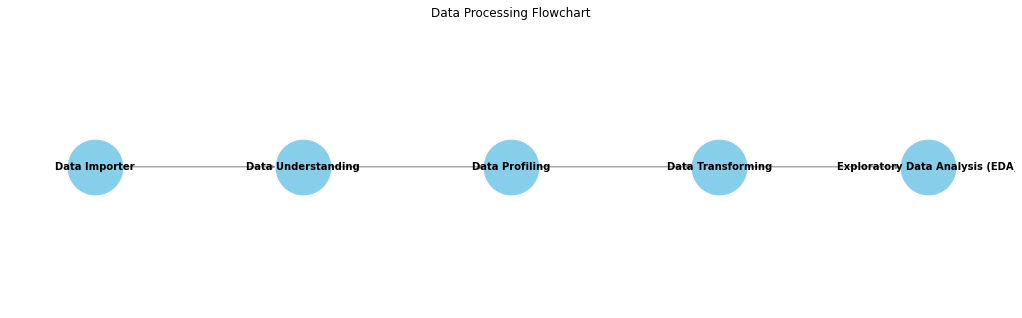

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = ["Data Importer", "Data Understanding", "Data Profiling", "Data Transforming", "Exploratory Data Analysis (EDA)"]
G.add_nodes_from(nodes)

# Add edges
edges = [("Data Importer", "Data Understanding"),
         ("Data Understanding", "Data Profiling"),
         ("Data Profiling", "Data Transforming"),
         ("Data Transforming", "Exploratory Data Analysis (EDA)")]
G.add_edges_from(edges)

# Manually specify positions
pos = {
    "Data Importer": (0, 0),
    "Data Understanding": (1, 0),
    "Data Profiling": (2, 0),
    "Data Transforming": (3, 0),
    "Exploratory Data Analysis (EDA)": (4, 0)
}

# Plot the graph
plt.figure(figsize=(14, 4))  # Adjust the figure size for horizontal layout
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True, node_shape='o', edge_color='gray')
plt.title("Data Processing Flowchart")
plt.show()